# Handling time and frequency domain signals : `Bsignal` Class

This section presents some features of the classes implemented in the [`pylayers.signal.bsignal.py`](http://pylayers.github.io/pylayers/modules/pylayers.signal.bsignal.html) module.

In [1]:
%matplotlib inline

The `Bsignal` class is a container for a signal with a base which can be either in time domain or frequency domain.

In [4]:
from pylayers.signal.bsignal import *
from matplotlib.pyplot import *

As a first example, let construct an impulse signal normalized in energy. To do so there exist a specialized function : [`EnImpulse`](http://pylayers.github.io/pylayers/modules/generated/pylayers.signal.bsignal.EnImpulse.demo.html#pylayers.signal.bsignal.EnImpulse.demo)

In [5]:
E=EnImpulse(fe=40)

In [8]:
>>> from pylayers.signal.bsignal import *
>>> ip    = EnImpulse(fc=4,band=3,thresh=10,fe=100)
>>> Eip1  = ip.energy()
>>> ESDu  = ip.esd(mode='unilateral')
>>> ESDb  = ip.esd(mode='bilateral')
>>> df    = ESDu.dx()
>>> Eipu  = sum(ESDu.y)*df
>>> Eipb  = sum(ESDb.y)*df
>>> erru  = Eip1-Eipu
>>> errb  = Eip1-Eipb

In [10]:
print Eip1

100.000007743


(<matplotlib.figure.Figure at 0x7fa60bd3b6d0>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7fa60bd3bbd0>]], dtype=object))

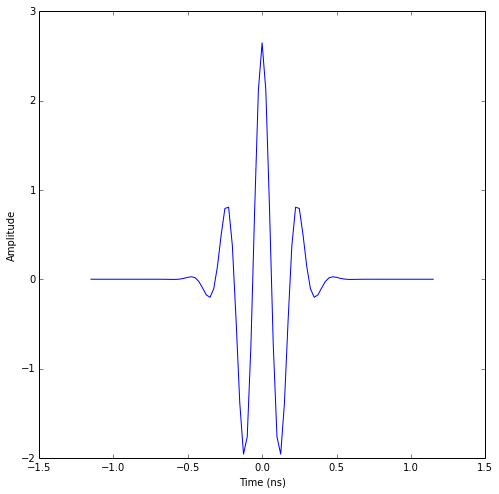

In [6]:
E.plot(typ='v')

In [7]:
E.energy()

40.000003097054716

The Fourier transform of this signal has the hermitian Symmetry.

(<matplotlib.figure.Figure at 0x7f6414023110>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f641402e210>]], dtype=object))

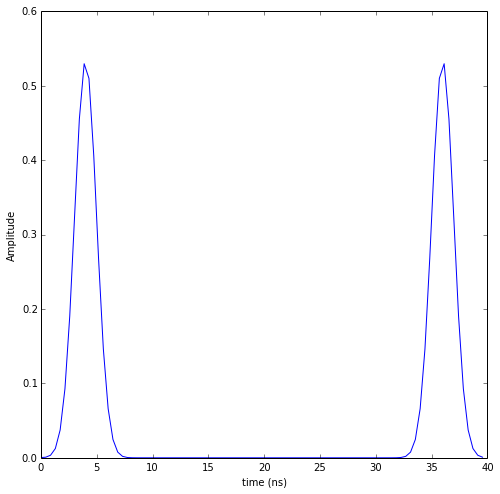

In [6]:
F = E.fft()
F.plot(typ='m')

In [7]:
F.y[0]

(0.00029728997658457938+0j)

We then extract the non redundant part of the signal with the `ft` method

In [8]:
G=E.ft()

In [9]:
GH=G.symHz(100,scale='extract')

In [10]:
print GH.y[1]
print GH.y[-1]

(-0.0014441784194-4.88037298122e-05j)
(-0.0014441784194+4.88037298122e-05j)


In [11]:
ip=F.ifft()
ip2=GH.ifft()

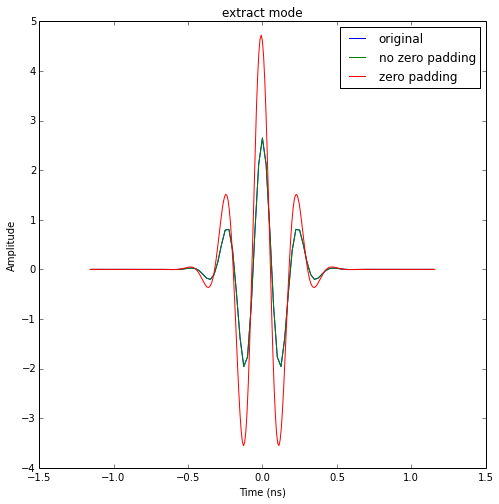

In [12]:
f,a=E.plot(typ='v',labels=['original'])
f,a=ip.plot(typ='v',fig=f,ax=a[0][0],labels=['no zero padding'])
f,a=ip2.plot(typ='v',fig=f,ax=a[0][0],labels=['zero padding'])
title('extract mode')

In [13]:
ip.energy()

40.000003097054773

In [14]:
ip2.energy()

401.35111446263471

In [15]:
Y=E.esd()

FHsignal for in CIR mode
------------------------

We create a Fusignal which corresponds to the signal

$$X_u(f) = \alpha e^{-2j\pi f \tau}$$

$$f\in [f_{min},f_{max}]$$

In [16]:
f = np.arange(2,10,0.01)
y = 2*np.ones(len(f))*np.exp(-2*1j*np.pi*f*3)
N = len(f)
Hu = FUsignal(f,y)
print N

800


(<matplotlib.figure.Figure at 0x7f6413f8da50>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f6413f80a90>]], dtype=object))

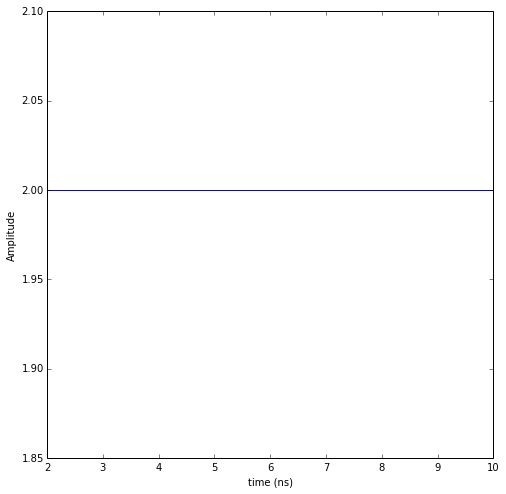

In [17]:
Hu.plot(typ='m')

In [18]:
hu = Hu.ifft()

The inverse Fourier transform allows to recover perfectly the amplitude $\alpha$ and the delay $\tau$
of the channel 

(<matplotlib.figure.Figure at 0x7f6413be6fd0>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f6413c40390>]], dtype=object))

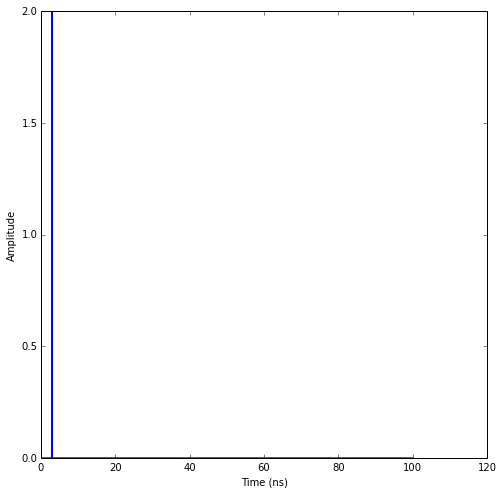

In [19]:
hu.plot(typ='m')

In [20]:
real=np.imag(hu.y)
u = np.where(hu.y==max(hu.y))[0]
tau = hu.x[u]
alpha = abs(hu.y[u])
print alpha,tau

[ 2.] [ 3.00375469]


In [21]:
H = Hu.symHz(100,scale='cir')

(<matplotlib.figure.Figure at 0x7f6413b7fad0>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f6413c1e110>]], dtype=object))

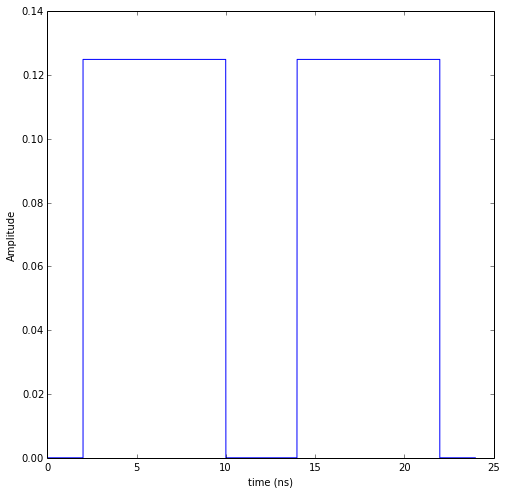

In [22]:
H.plot(typ='m')

In [25]:
h = H.ifft()

(<matplotlib.figure.Figure at 0x7f6413b14710>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f6413b14a10>]], dtype=object))

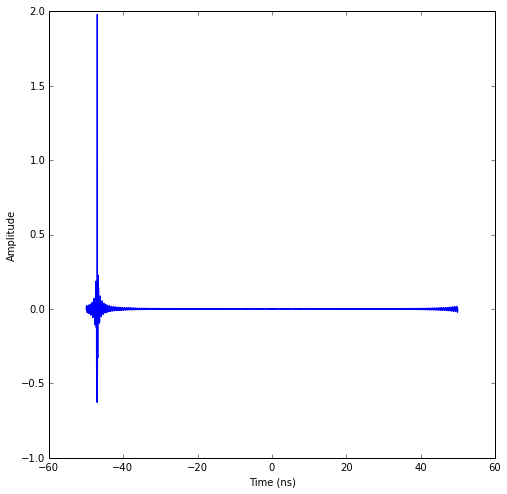

In [26]:
h.plot(typ='v')

In [27]:
real=np.imag(h.y)
u = np.where(h.y==max(h.y))[0]
tau = h.x[u]
alpha = abs(h.y[u])
print alpha,tau

[ 1.97995425] [-46.97864607]


In [28]:
fft.ifft(H.y)

array([ -1.93565190e-15 -1.70240923e-19j,
         2.62295322e-04 -3.27871407e-19j,
         8.73458329e-04 -4.09839258e-20j, ...,
        -1.06670199e-04 +2.90350482e-19j,
        -8.69428086e-04 -1.58117458e-18j,  -5.31550980e-05 -2.71727936e-20j])

In [29]:
print H.y[203]
print H.y[-203]
len(H.y)

(0.116169256529-0.0459946624208j)
(0.116169256529+0.0459946624208j)


2201

In [30]:
Y=h.fft()

(<matplotlib.figure.Figure at 0x7f6413963bd0>,
 array([[<matplotlib.axes.AxesSubplot object at 0x7f64139cb8d0>]], dtype=object))

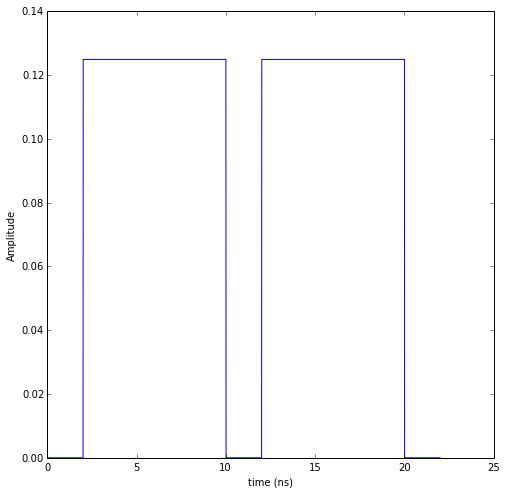

In [31]:
Y.plot(typ='m')